# NMF Test

In [19]:
# imports

from matplotlib import pyplot as plt

import seaborn as sns

from NonnegMFPy import nmf

from oceancolor.ihop import io as ihop_io
from oceancolor.hydrolight import loisel23

In [18]:
%matplotlib ipympl

# Load spectra

In [11]:
X=4
Y=0
ds = loisel23.load_ds(X, Y)

In [21]:
spec = ds['a'].data
spec.shape

(3320, 81)

# Run it!

In [22]:
g = nmf.NMF(spec.T, n_components=5)

In [23]:
chi2, time_used = g.SolveNMF() 

Current Chi2=0.0164, Previous Chi2=1.4304, Change=98.8519% @ niters=0
Current Chi2=0.0023, Previous Chi2=0.0023, Change=1.7692% @ niters=20
Current Chi2=0.0019, Previous Chi2=0.0019, Change=0.3302% @ niters=40
Current Chi2=0.0018, Previous Chi2=0.0018, Change=0.3096% @ niters=60
Current Chi2=0.0017, Previous Chi2=0.0017, Change=0.7469% @ niters=80
Current Chi2=0.0014, Previous Chi2=0.0014, Change=1.1748% @ niters=100
Current Chi2=0.0010, Previous Chi2=0.0011, Change=1.4337% @ niters=120
Current Chi2=0.0008, Previous Chi2=0.0008, Change=1.6842% @ niters=140
Current Chi2=0.0005, Previous Chi2=0.0005, Change=1.7033% @ niters=160
Current Chi2=0.0004, Previous Chi2=0.0004, Change=1.4506% @ niters=180
Current Chi2=0.0003, Previous Chi2=0.0003, Change=1.1312% @ niters=200
Current Chi2=0.0002, Previous Chi2=0.0002, Change=0.8961% @ niters=220
Current Chi2=0.0002, Previous Chi2=0.0002, Change=0.7597% @ niters=240
Current Chi2=0.0002, Previous Chi2=0.0002, Change=0.6907% @ niters=260
Current Chi

In [24]:
g.W.shape

(81, 5)

# Plot the basis set

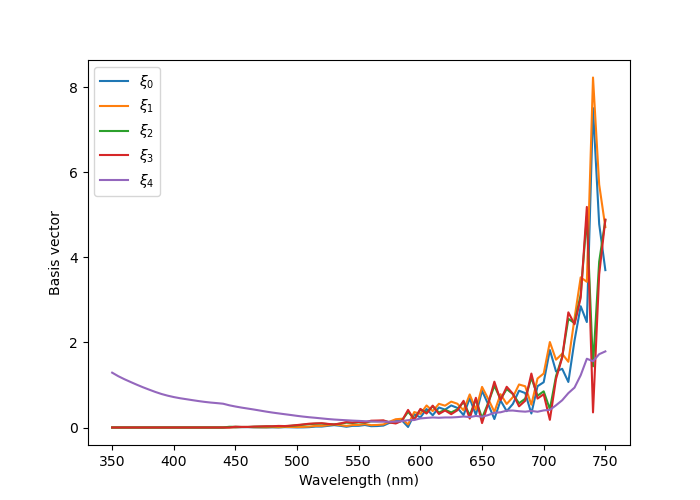

In [30]:
M = g.W.T
wave = ds.Lambda.data
#
fig = plt.figure(figsize=(7,5))

plt.clf()
ax = plt.gca()
for ss in range(5):
    ax.plot(wave,M[ss], label=r'$\xi_'+f'{ss}'+'$')
#ax.plot(wave,M[1], label=r'$\xi_2$')
#ax.plot(wave,M[2], label=r'$\xi_3$')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Basis vector')
ax.legend()
#
plt.show()